In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load your dataset
data = pd.read_excel('Stress.xlsx')

In [17]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Stress Level
0,0,1,1,1,0,0,1,2,0,0,...,0,0,1,0,0,0,1,0,3,Mild
1,1,1,1,1,1,1,2,0,1,1,...,0,0,2,1,1,1,2,1,2,Moderate
2,0,3,1,3,0,1,1,3,1,2,...,1,3,3,2,1,3,0,1,3,Severe
3,3,0,2,0,1,0,1,2,2,0,...,2,0,1,0,1,0,1,0,0,Moderate
4,3,2,3,2,3,1,3,2,2,2,...,3,2,3,1,1,0,2,2,1,Severe


In [18]:
# Basic info about the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Q1            1000 non-null   int64 
 1   Q2            1000 non-null   int64 
 2   Q3            1000 non-null   int64 
 3   Q4            1000 non-null   int64 
 4   Q5            1000 non-null   int64 
 5   Q6            1000 non-null   int64 
 6   Q7            1000 non-null   int64 
 7   Q8            1000 non-null   int64 
 8   Q9            1000 non-null   int64 
 9   Q10           1000 non-null   int64 
 10  Q11           1000 non-null   int64 
 11  Q12           1000 non-null   int64 
 12  Q13           1000 non-null   int64 
 13  Q14           1000 non-null   int64 
 14  Q15           1000 non-null   int64 
 15  Q16           1000 non-null   int64 
 16  Q17           1000 non-null   int64 
 17  Q18           1000 non-null   int64 
 18  Q19           1000 non-null   int6

In [19]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Q1           Q2          Q3           Q4           Q5  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      0.855000     0.900000     0.88100     0.909000     0.876000   
std       0.939605     0.920243     0.91196     0.930368     0.932466   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       1.000000     1.000000     1.00000     1.000000     1.000000   
75%       1.000000     1.000000     1.00000     1.000000     1.000000   
max       3.000000     3.000000     3.00000     3.000000     3.000000   

                Q6           Q7           Q8          Q9          Q10  ...  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000  ...   
mean      0.886000     0.853000     0.910000     0.89500     0.937000  ...   
std       0.902119     0.932878     0.968937     0.94067     0.971584  ...   
min      

In [20]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Q1              0
Q2              0
Q3              0
Q4              0
Q5              0
Q6              0
Q7              0
Q8              0
Q9              0
Q10             0
Q11             0
Q12             0
Q13             0
Q14             0
Q15             0
Q16             0
Q17             0
Q18             0
Q19             0
Q20             0
Q21             0
Stress Level    0
dtype: int64


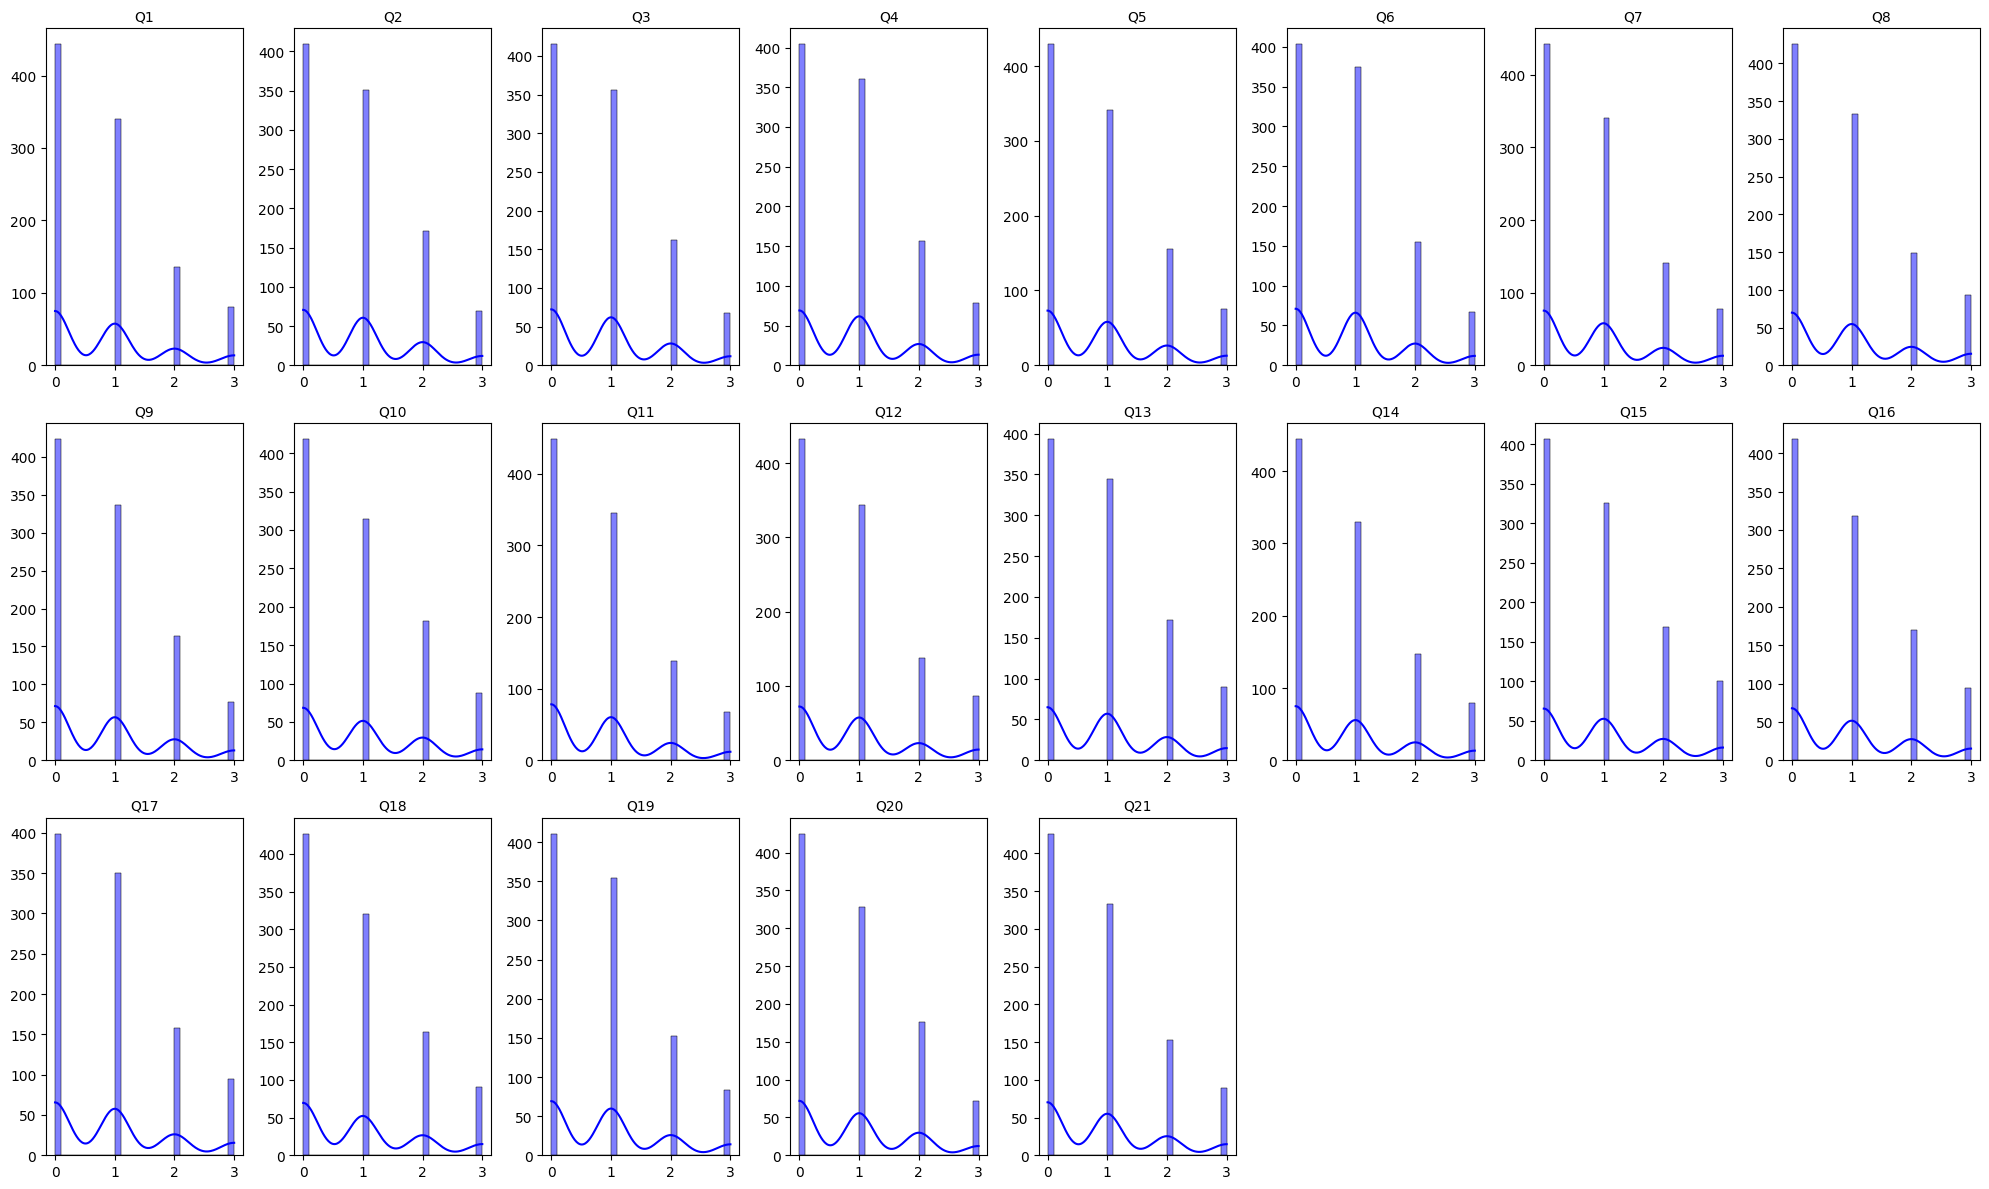

In [21]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for all numeric columns
num_cols = len(numeric_columns)  # Number of numeric columns
rows = (num_cols // 8) + (1 if num_cols % 8 != 0 else 0)  # Calculate rows for 8 columns per row

fig, axes = plt.subplots(rows, 8, figsize=(20, 4 * rows))  # Dynamic figsize for 8 columns per row
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

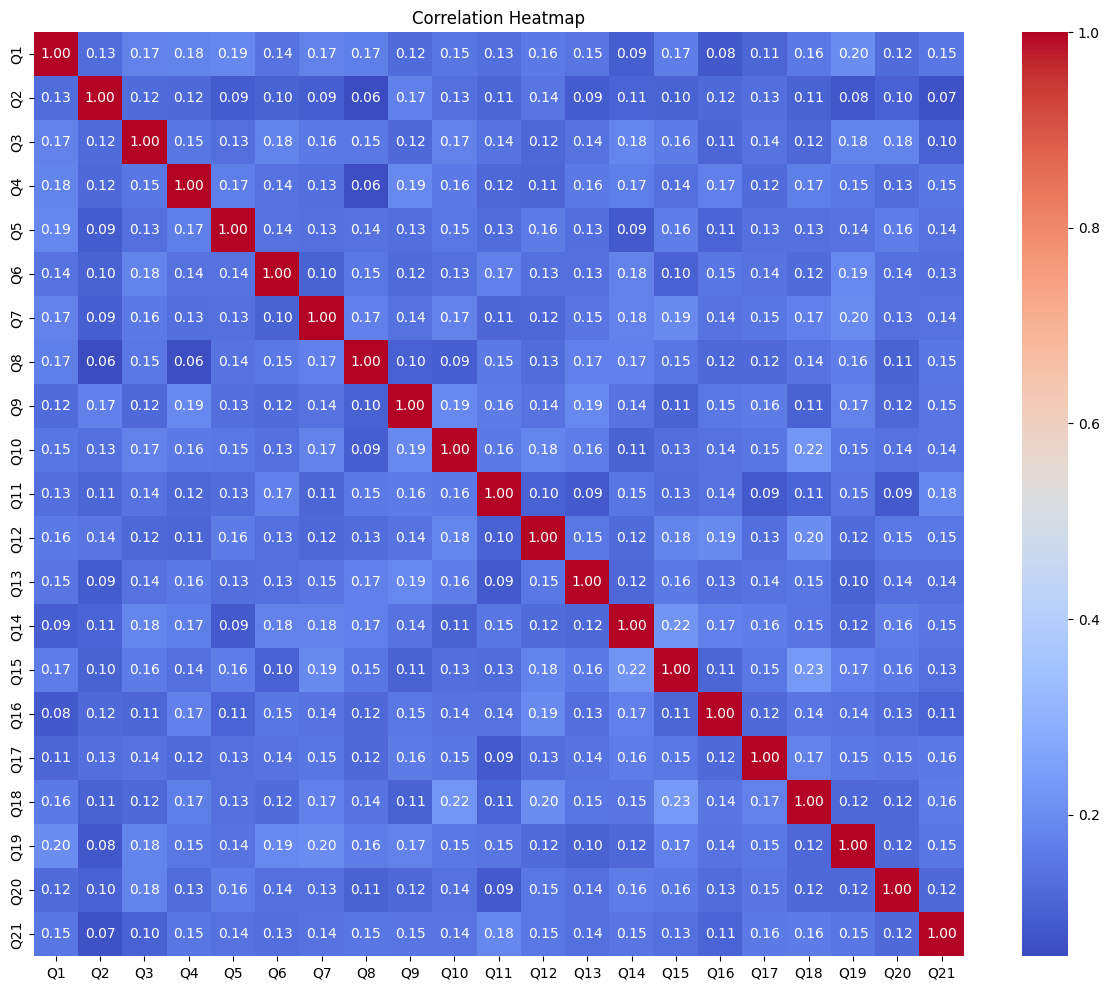

In [22]:
# Correlation heatmap (only for numeric features)
plt.figure(figsize=(15, 12))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\conda_tmp\ipykernel_5172\2749188031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[target_column], palette='viridis')


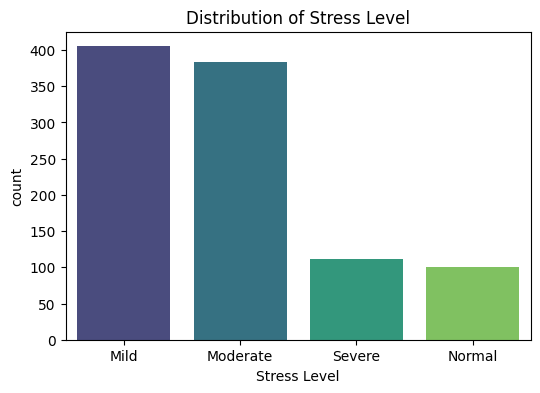

In [23]:
# Target distribution (for categorical output column)
target_column = 'Stress Level'  # Change this to your column name
if target_column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[target_column], palette='viridis')
    plt.title(f'Distribution of {target_column}')
    plt.show()



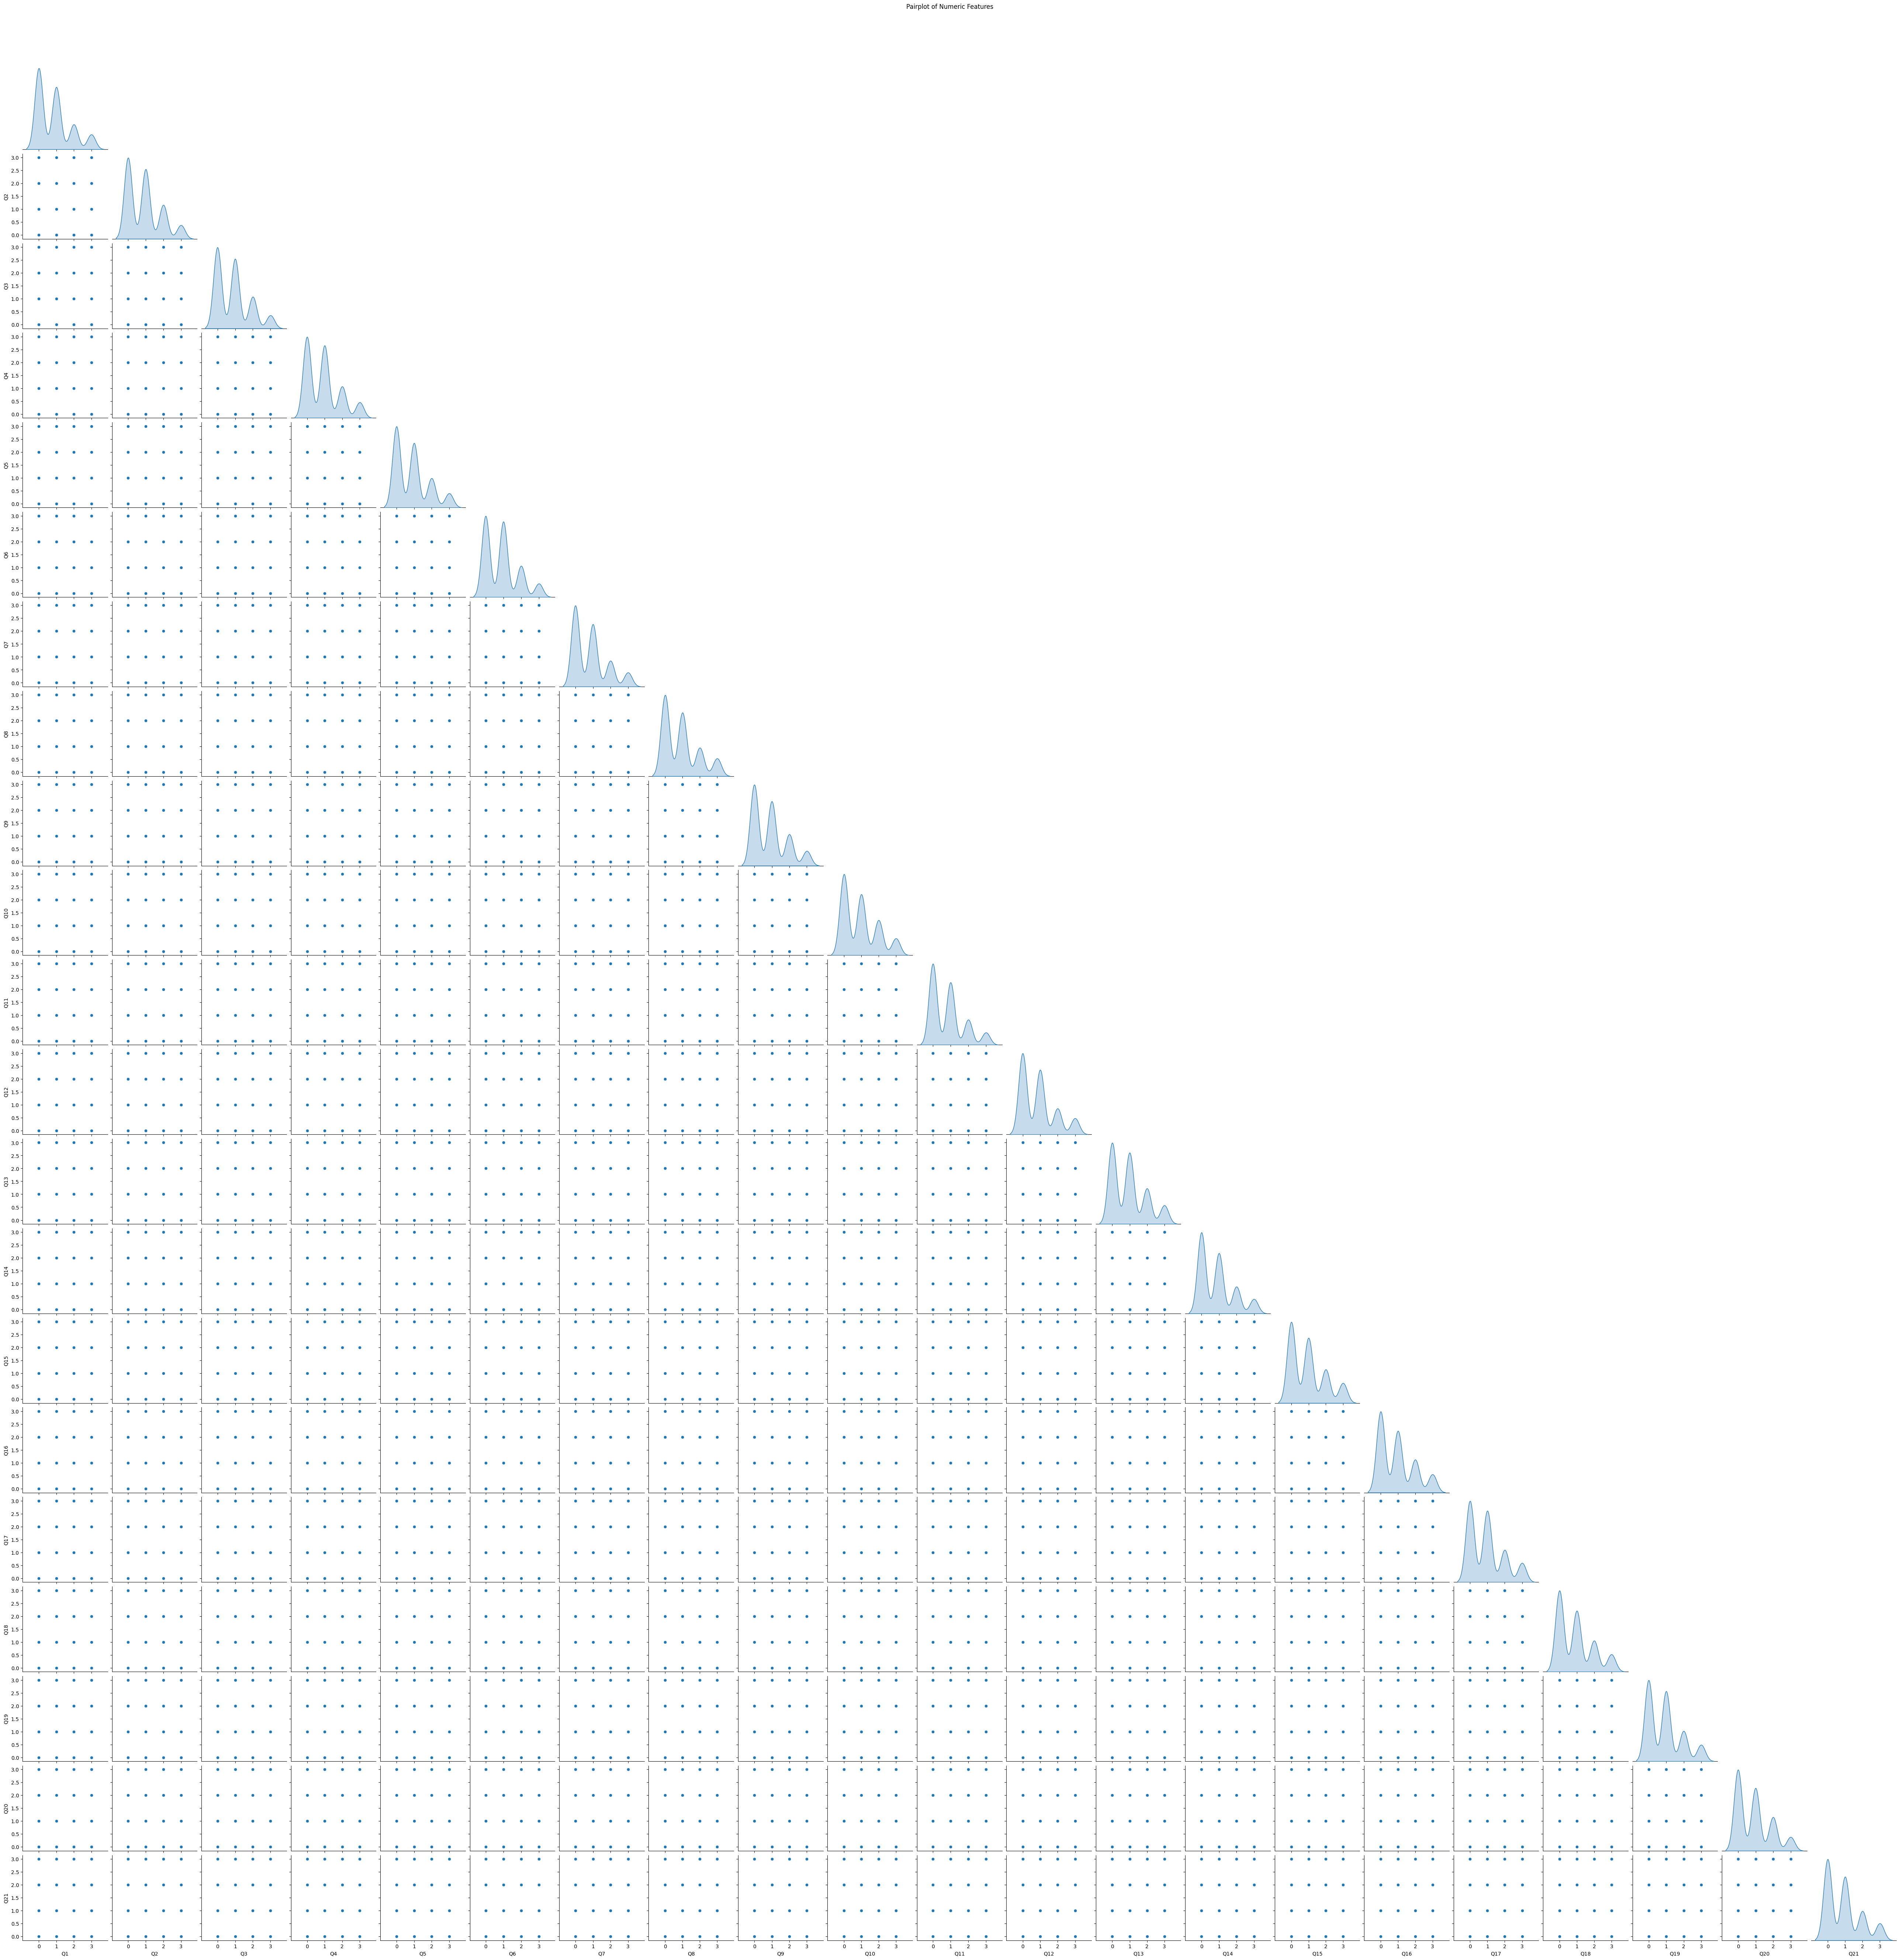

In [24]:
# Pairplot for feature relationships
sns.pairplot(data[numeric_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [25]:
# Separate features and target
X = data.iloc[:, :-1]  # Assuming the first 10 columns are numeric features
y = data.iloc[:, -1]   # Assuming the last column is the categorical target

In [26]:
# Encode the categorical target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [28]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

In [29]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.94
Random Forest: Accuracy = 0.73
Support Vector Machine: Accuracy = 0.88


In [30]:
# Find the best algorithm
best_model_name = max(results, key=results.get)
print(f"\nBest Algorithm: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


Best Algorithm: Logistic Regression with Accuracy = 0.94


C:\conda_tmp\ipykernel_5172\802701280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


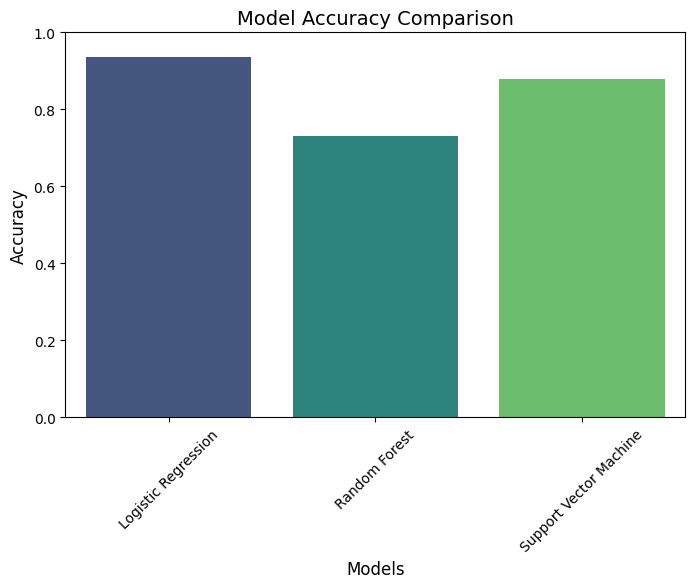

In [31]:
# Create a bar chart for accuracies
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [33]:
import joblib

# Find the best model object
best_model = models[best_model_name]

# Save the trained model object
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')  # Replace 'label_encoder' with your encoder object
print("Label encoder saved as 'label_encoder.pkl'")


Best model saved as 'best_model.pkl'
Label encoder saved as 'label_encoder.pkl'


In [34]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('best_model.pkl')
print("Model loaded successfully")

# Load the label encoder
loaded_encoder = joblib.load('label_encoder.pkl')
print("Label encoder loaded successfully")

# Sample input
sample_input = np.array([[2, 0, 1, 3, 3, 2, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 1, 2, 1, 0]])

# Ensure input is reshaped correctly (1 sample, 10 features)
if sample_input.shape[1] != 21:
    print("Error: Sample input must have 10 features.")
else:
    # Predict the encoded class
    predicted_class_encoded = loaded_model.predict(sample_input)

    # Decode the class to its original label
    predicted_class = loaded_encoder.inverse_transform(predicted_class_encoded)

    print(f"Predicted class for the sample input: {predicted_class[0]}")


Model loaded successfully
Label encoder loaded successfully
Predicted class for the sample input: Severe


g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
